# **PART A**

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Import file
df = pd.read_csv('Birthweight_reduced.csv')

In [3]:
#Explore first 5 rows of the dataframe
df.head(n=5)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [4]:
# Gives number of rows : 42
count_row = df.shape[0]  
count_row

42

In [5]:
# Gives number of columns : 17
count_col = df.shape[1]  
count_col

17

In [6]:
#Columns in this df
print(df.columns.values)

['id' 'headcirumference' 'length' 'Birthweight' 'Gestation' 'smoker'
 'motherage' 'mnocig' 'mheight' 'mppwt' 'fage' 'fedyrs' 'fnocig' 'fheight'
 'lowbwt' 'mage35' 'LowBirthWeight']


# Pairplots using seaborn

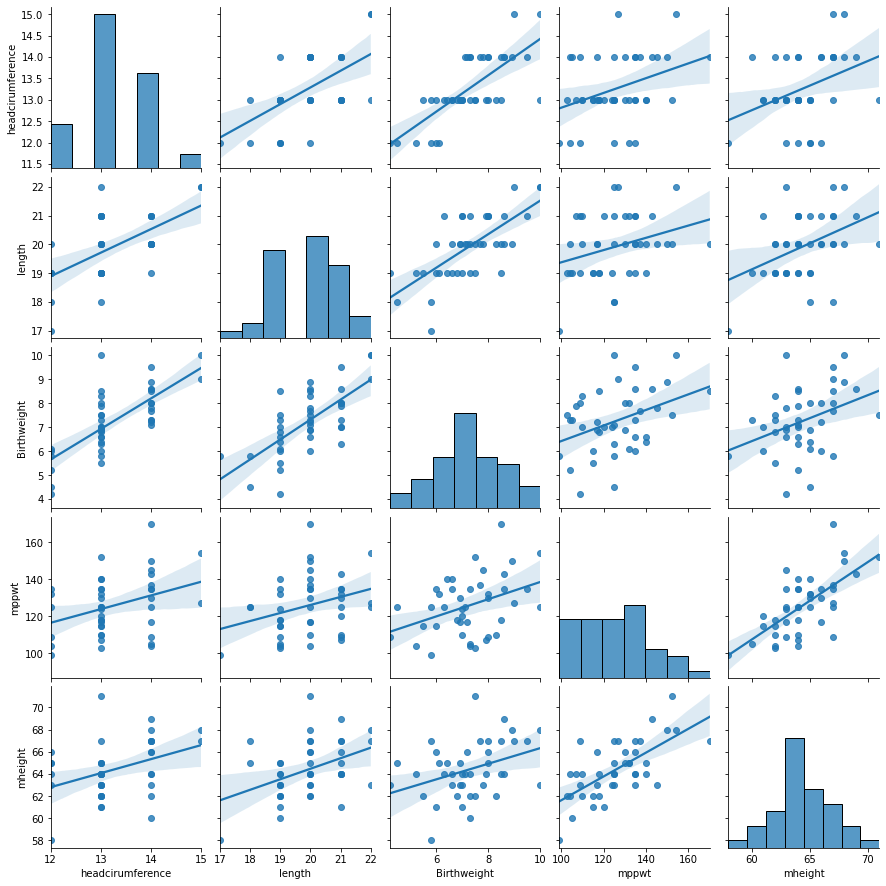

In [7]:
p = sns.pairplot(df, vars=['headcirumference','length','Birthweight','mppwt','mheight'],kind='reg')

### Pairplot interpretation 

Some of them appeared to have linear relationship between variables. Some don't have relationships with the others

1. headcirumference has positive, weak, linear relationship with Birthweight
2. length has a positive relationship with Birthweight
3. mppwt has a positive linear relationship with mheight


**Correlations**

In [8]:
# Correlations values between 'headcirumference','length','Birthweight','mppwt','mheight'
df_corr=df[['headcirumference','length','Birthweight','mppwt','mheight']].corr().loc[['headcirumference','length','Birthweight','mppwt','mheight']]
df_corr

,headcirumference,length,Birthweight,mppwt,mheight
headcirumference,1.000000,0.565328,0.736396,0.357594,0.381293
length,0.565328,1.000000,0.697008,0.304394,0.414731
Birthweight,0.736396,0.697008,1.000000,0.389581,0.367947
mppwt,0.357594,0.304394,0.389581,1.000000,0.671247
mheight,0.381293,0.414731,0.367947,0.671247,1.000000


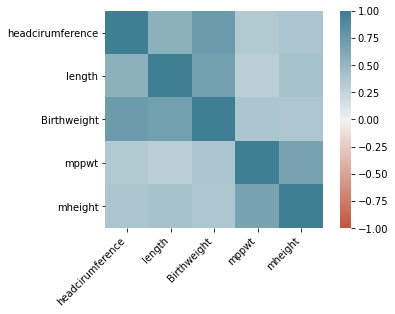

In [9]:
# Correlation matrix heatmap
ax = sns.heatmap(df_corr, 
                 vmin=-1, 
                 vmax=1, 
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200), 
                 square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

***Interprete correlation results***

* 'headcirumference' has postive relationship with 'length', 'Birthweight', 'mppwt', and 'height'. Besides, 'headcirumference' has stronger postive relationship with 'Birthweight' (0.736) and moderate relationship with 'length' (0.565328)

* 'length' has a moderate positive relationship with 'headcirumference', strong positive relationship with 'Birthweight' and weaker realtionships with 'mppwt'and 'mheight'

* 'Birthweight' has a strong postive relationship with 'headcirumference' (0.736) and 'length' (0.697). Besides, it has weaker postive relationships with 'mppwt' and 'mheight'

* 'mppwt' has strong and postive relationship with 'mheight' (0.671) and weaker postive relationships with 'headcirumference','length' and 'Birthweight'

* 'mheight' has postive relationship with 'mppwt' and weaker relationships with 'headcirumference','length','Birthweight'

# Research question 1 
Configure the attribute "mppwt" as predictor(independent) variable and "Birthweight" outcome (dependent) variable.

In [10]:
# Independent variable 'mppwt'
x1 = df['mppwt'].values.reshape(-1,1)
print(x1)

[[ 99]
 [109]
 [140]
 [125]
 [125]
 [118]
 [104]
 [132]
 [103]
 [109]
 [135]
 [125]
 [140]
 [124]
 [135]
 [125]
 [104]
 [170]
 [115]
 [152]
 [115]
 [110]
 [135]
 [130]
 [117]
 [137]
 [107]
 [105]
 [130]
 [135]
 [127]
 [120]
 [135]
 [145]
 [110]
 [117]
 [154]
 [143]
 [132]
 [125]
 [118]
 [150]]


In [11]:
# Dependent variable 'Birthweight'
y1 = df['Birthweight'].values
print(y1)

[ 5.8  4.2  6.4  4.5  5.8  6.8  5.2  6.1  7.5  8.   8.6  7.1  6.6  7.
  6.6  6.3  7.3  8.5  5.5  7.5  6.   8.3  9.5  6.9  7.2  7.7  7.9  7.3
  8.   6.   9.   7.   7.3  7.8  7.   6.9 10.   8.6  8.  10.   8.5  8.9]


In [12]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Testing set 20%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

**Training the Simple Regression Model**

In [14]:
lm = LinearRegression()
lm.fit(x_train1, y_train1)

LinearRegression()

**Predicting Test set result**


In [15]:
y_pred1 = lm.predict(x_test1)
y_pred1

array([7.38336339, 8.02043652, 7.5957211 , 7.38336339, 9.29458279,
       7.80807881, 8.53009503, 7.04359105, 7.17100567])

In [16]:
x_pred1 = lm.predict(x_train1)
x_pred1

array([7.80807881, 6.74629025, 8.23279423, 6.53393254, 6.74629025,
       7.46830647, 7.80807881, 7.68066418, 7.38336339, 7.80807881,
       7.80807881, 8.44515195, 7.04359105, 6.61887562, 8.61503811,
       6.95864796, 6.95864796, 7.89302189, 6.491461  , 7.5957211 ,
       7.34089184, 7.68066418, 7.08606259, 6.70381871, 6.491461  ,
       6.27910329, 7.38336339, 7.08606259, 7.38336339, 6.70381871,
       6.44898945, 8.02043652, 8.14785115])

**Visualizing the Training set result**

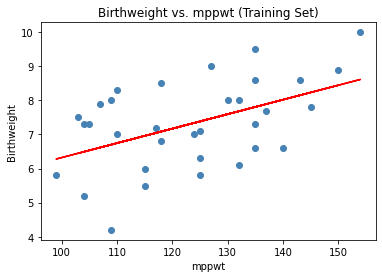

In [17]:
#Scatter plot
plt.scatter(x_train1, y_train1, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train1, x_pred1, color = 'red')
plt.title('Birthweight vs. mppwt (Training Set)')
plt.xlabel('mppwt')
plt.ylabel('Birthweight')
plt.show()

**Visualizing the Test set result**

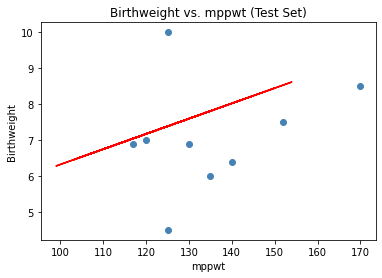

In [18]:
#Scatter plot
plt.scatter(x_test1, y_test1, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train1, x_pred1, color = 'red')
plt.title('Birthweight vs. mppwt (Test Set)')
plt.xlabel('mppwt')
plt.ylabel('Birthweight')
plt.show()

In [19]:
lm.intercept_

2.07442059205579

In [20]:
lm.coef_

array([0.04247154])

***Intercept and Coefficient values interpretation***

Mother pre-pregnancy ('mppwt') and Weight of baby ('Birthweight') have a positive linear relationship

* Intercept value of Mother pre-pregnancy and Weight of baby is 2.074. 
Meaning that, the expected mean value of Weight of baby is 2.074 when Mother pre-pregnancy value equals to 0. However, this intercept has no intrinsic meaning since Mother pre-pregnancy weight never equals 0.
* For every lbs increase in Mother pre-pregnancy weight, the Weight of baby will increase by 0.0425 lbs.

# Research question 2 
Configure the attribute "mheight" as predictor(independent) variable and "Length" outcome (dependent) variable.

In [21]:
# Independent variable 'mppwt'
x2 = df['mheight'].values.reshape(-1,1)
print(x2)

[[58]
 [63]
 [65]
 [65]
 [67]
 [62]
 [64]
 [65]
 [62]
 [67]
 [64]
 [64]
 [64]
 [63]
 [63]
 [64]
 [62]
 [67]
 [62]
 [71]
 [61]
 [62]
 [67]
 [65]
 [66]
 [67]
 [64]
 [60]
 [66]
 [66]
 [67]
 [61]
 [64]
 [63]
 [64]
 [63]
 [68]
 [69]
 [65]
 [63]
 [64]
 [68]]


In [22]:
# Dependent variable 'Birthweight'
y2 = df['length'].values
print(y2)

[17 19 19 18 18 19 19 19 19 21 20 20 20 19 19 21 20 20 19 20 19 20 21 20
 20 20 21 19 21 20 22 21 21 20 21 20 22 21 21 22 19 20]


In [23]:
# Testing set 20%
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 1)

**Training the Simple Regression Model**

In [24]:
lm2 = LinearRegression()

In [25]:
lm2.fit(x_train2, y_train2)

LinearRegression()

**Predicting Test set result**


In [26]:
y_pred2 = lm2.predict(x_test2)
y_pred2

array([20.133292  , 20.133292  , 20.133292  , 19.56416615, 20.70241785,
       20.41785493, 21.84066956, 19.56416615, 18.9950403 ])

In [27]:
x_pred2 = lm2.predict(x_train2)
x_pred2

array([20.70241785, 19.27960322, 19.56416615, 18.71047737, 19.84872908,
       20.70241785, 19.84872908, 20.133292  , 20.70241785, 19.56416615,
       19.84872908, 20.98698078, 20.41785493, 19.84872908, 20.98698078,
       18.9950403 , 19.27960322, 20.70241785, 19.84872908, 20.41785493,
       19.56416615, 20.133292  , 19.84872908, 19.56416615, 19.27960322,
       18.14135152, 19.84872908, 19.27960322, 19.84872908, 20.70241785,
       19.27960322, 19.84872908, 21.27154371])

**Visualizing the Training set result**

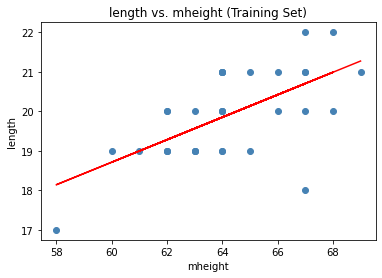

In [28]:
#Scatter plot
plt.scatter(x_train2, y_train2, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train2, x_pred2, color = 'red')
plt.title('length vs. mheight (Training Set)')
plt.xlabel('mheight')
plt.ylabel('length')
plt.show()

**Visualizing the Test set result**

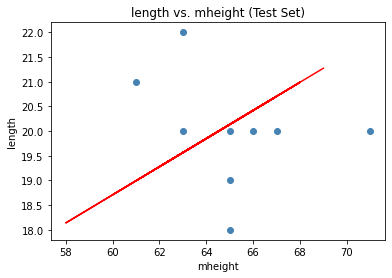

In [29]:
#Scatter plot
plt.scatter(x_test2, y_test2, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train2, x_pred2, color = 'red')
plt.title('length vs. mheight (Test Set)')
plt.xlabel('mheight')
plt.ylabel('length')
plt.show()

In [30]:
lm2.intercept_

1.636701797892119

In [31]:
lm2.coef_

array([0.28456293])

***Intercept and Coefficient values interpretation***

* Intercept value of 'mheight'(x) and 'length' (y) is 1.636. 
Meaning that, the expected mean value of Length of baby is 1.636 inches when Mothers height value = 0 inches. However, this intercept has no intrinsic meaning since Mother height never equals 0.

* For every one inches increase in Mother height, Length of baby will increase by 0.284